In [1]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Wahrscheinlichkeitstheorie

### Zufallsvariable und Wahrscheinlichkeitsraum
### Diskrete Zufallsvariablen und Wahrscheinlichkeitsverteilungen
### <span style="color:blue">Kontinuierliche Zufallsvariable und Wahrscheinlichkeitsverteilungen</span>

#### Wahrscheinlichkeitsdichte
- Unendlich viele dichte Ereignisse ($x\in\mathbb{R}$)

#### <span style="color:blue">kontinuierliche Verteilungen</span>
- <span style="color:blue">Gleich- / Rechteckverteilung</span>
- <span style="color:blue">Normalverteilung</span>
- <span style="color:blue">Exponentialverteilung</span>
- besondere Verteilungen

### Wiederholung: diskrete binomiale Wahrscheinlichkeitsverteilungen
- Bernoulli-Experiment
- mehrere unabhängige identische Wiederholungen *i.i.d*

#### Binomialverteilung
- Anzahl des Eintretens

#### Geometrische Verteilung
- Anzahl der Versuche bis zum Eintreten 

#### Poissonverteilung
- Anzahl seltener Ereignisse im Intervall

### Gemeinsamkeit: Anzahl $\in \mathbb{N}$

# Multinomiale Verteilung
Erweiterung des Bernoulli-Zufall-Experiments auf mehrere mögliche Ergebnisse (Elementarereignisse): 

$$\Omega=\{a_i\}\quad i>2$$

**Experiment:** ***Ein*** Objekt wird daraus gezogen/beobachtet/gemessen/...

#### Beispiele
- Roulette
- Objekte bei Verkehrszählung
- Eigenschaften bei Populationen
- Parteien zur Wahl

    np.random.multinomial?
    multinomial(n, pvals, size=None)
    The multinomial distribution is a multivariate generalisation of the binomial distribution.  

In [3]:
'''multinomial example: a single die'''
N = 6                                          # how many possible results? 
omega = 1+np.arange(6)                         # the pips of the die (starting at one)
print('x: ', omega)                            # reference: possible outcomes
ps = N*[1/N]                                   # Laplace: 6 equally distributed
x = np.random.multinomial(n=1, pvals=ps)       # one experiment: draw a single sample
print('f: ', x)                                # vector of *where* the result is!
print('we obtained a {}'.format(omega[x==1]))  # which of the sides shows up face?

x:  [1 2 3 4 5 6]
f:  [0 0 1 0 0 0]
we obtained a [3]


In [4]:
'''multinomial with two dice'''
x2 = np.random.multinomial(n=2, pvals=ps)      # a combined experiment: throw two dice at once
print(omega)
print(x2)
pasch = len(x2[x2==2]) > 0                     # 2 of same kind? vector has (one) element: a 2
if pasch:
    print('we got a {}-pasch'.format(omega[x2==2]))     # show the only place of the 2
else:                                                   # show 1st and 2nd place of two 1s
    print('we got a {} and a {}'.format(omega[x2==1][0], omega[x2==1][1])) 

[1 2 3 4 5 6]
[0 1 0 0 1 0]
we got a 2 and a 5


In [5]:
'''repeat throwing two dice five times'''
x25 = np.random.multinomial(n=2, pvals=ps, size=5)  # five combined experiments: two dice at once
print(' ', omega, ' omega')
print(x25, ' results')                              # now a 2D matrix 
print(x25.shape, 'shape of results-matrix')         #            of shape (#repetitions x #elements)
pasches = len(x25[x25==2])                          # how many 2 of same kind?
print('we got {} of same kind'.format(pasches))

  [1 2 3 4 5 6]  omega
[[0 0 0 1 1 0]
 [0 0 1 0 0 1]
 [0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]  results
(5, 6) shape of results-matrix
we got 0 of same kind


In [6]:
print(omega, 'numbers')
print(x25.sum(axis=0), 'frequency total')

[1 2 3 4 5 6] numbers
[0 1 1 4 2 2] frequency total


In [7]:
'''another variant: without replacement'''
N = 49                                                       # how many possible results? 
p49 = N*[1/N]                                                # Laplace: 49 possible numbers
omega49 = np.arange(1, 49+1)                                 # ball's numbers
n49 = 6                                                      # how many repetitions?
lotto = np.random.choice(a=omega49, size=n49, replace=False) # draw 6 out of 49 without replacement
print('Lotto today gives {}. Maybe.'.format(np.sort(lotto)))

Lotto today gives [ 3 18 31 34 43 49]. Maybe.


## Zusammenfassung Multinomiale Verteilung
- Mehr als zwei mögliche Elementarereignisse
- i.i.d. Wiederholungen / Kombinationen möglich

### Python
- Keine Verteilung in `scipy.stats`
- Möglichkeiten Zufallszahlen zu gewinnen
    - `np.random.choice()`
    - `np.random.multinomial()`

## Wiederholung: Mittelwert $\Leftrightarrow$ Erwartungswert

Arithmetischer **Mittelwert** von $n$ Ereignissen $x_j$
$$ \overline{x} = \frac{1}{n}\sum_{j=1}^{n} x_j$$

Diskrete Ereignisse $\;x_i$, $i\in\{1\dots N\}\;$ mit absoluter Häufigkeit $H_i$, $\;\sum H_i=n\;$, dann

$$ \overline{x} = \frac{1}{n}\sum_{i=1}^{N} H_i \cdot x_i$$

Mit relativen Häufigkeiten $h_i = \frac{H_i}{n}$ und damit $\sum h_i = 1$

$$ \overline{x} = \sum_{i=1}^{N} h_i \cdot x_i$$

Übergang zur (theoretischen) Wahrscheinlichkeit $p_i$ mit $\sum p_i=1$ : diskreter **Erwartungswert** der Zufallsvariable $X$

$$\mathcal{E}(X) = \mu = \sum_{i=1}^{N} p_i\cdot x_i$$
mit $p_i = p(X\!=\!x_i)$

# Kontinuierliche Verteilungen: $x\in\mathbb{R}$


### Wiederholung: Erwartungswert

#### Diskret
$$\mathcal{E}(X) = \mu = \sum_{i=1}^{N} p_i\cdot x_i$$
mit $p_i = p(X\!=\!x_i)$

#### Kontinuierlich
$$\mathcal{E}(X) = \mu = \int_{-\infty}^{\infty} f(x)\cdot x \;\mathrm{d}x$$
mit Wahrscheinlichkeitsdichte $f(x)$

### Wiederholung: kontinuierliche Zufallsvariable

Kontinuierliche Zufallsvariable $X$ mit $x \in \mathbb{R}$

#### Problem:
weil Punktwahrscheinlichkeit $P(x\!=\!a) \rightarrow 0$

#### Lösung
(endliche) Wahrscheinlichkeitsdichte $f(x)$

$$f(x) \geq 0$$

$$P(a\leq x \leq b) =  \int_{a}^{b} f(x)\;\mathrm{d}x \;\leq 1$$

Normierung
$\int_{x=-\infty}^{\infty} f(x)\mathrm{d}x = 1$

in width=0.20 are 100 drops, density=500.0
in width=0.05 are  29 drops, density=580.0
in width=0.01 are   6 drops, density=600.0


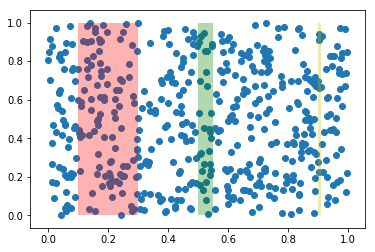

In [8]:
''''500 raindrops are falling - show density'''

----

# Kontinuierliche Verteilungen

# Gleichverteilung / Rechteckverteilung
<br>
$$x\in \left[a, b\right]$$

$$f(x) = const \qquad\qquad $$

$$\qquad\qquad\ = \frac{1}{b-a}$$

## Kennwerte Rechteck-/Gleichverteilung
<br>
$$\mathcal{E}(X) = \frac{a+b}{2}$$

$$Median(X) = \frac{a+b}{2}$$

$$\mathrm{Var}(X) = \sigma^2 = \frac{(b-a)^2}{12}$$

$$\sigma = \frac{|b-a|}{2\sqrt{3}}$$

#### Beweis: [ÜA]


In [9]:
'''uniform distribution % rectangle shaped
   probability density > 0 in range [a...b] = [loc...loc+range]
                       = 0 elsewhere                             '''
# uniform without parameters is in range [0, 1]
print('uniform()     has expectation value {:.5f} and variance {:.5f}'.
      format(stats.uniform.expect(), stats.uniform.var()))

# uniform in range [5..7] = [5..5+2]
unif_5_2 = stats.uniform(loc=5.0, scale=2.0)         # freeze these parameters
m52 = unif_5_2.expect()                              # frozen distribution's expectation
s52 = unif_5_2.std()                                 # ... and standard deviation
print('uniform(5, 2) has expectation value {:.5f} and std-dev. {:.5f}'.format( m52, s52))

uniform()     has expectation value 0.50000 and variance 0.08333
uniform(5, 2) has expectation value 6.00000 and std-dev. 0.57735


### Wahrscheinlichkeitsdichte $f(x)$, `pdf`

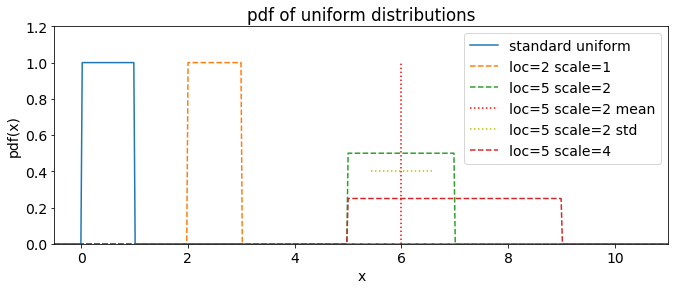

In [10]:
'''uniform distribution examples: probability density '''
plt.figure(figsize=(11,4))
x = np.linspace(-.5, 11., 465)
plt.plot(x, stats.uniform.pdf(x), label='standard uniform')
plt.plot(x, stats.uniform(loc=2., scale=1.).pdf(x), '--', label='loc=2 scale=1')
plt.plot(x, unif_5_2.pdf(x), '--', label='loc=5 scale=2')
plt.plot(2*[m52], [0, 1], 'r:', label='loc=5 scale=2 mean')
plt.plot([m52-s52, m52+s52], 2*[.4], 'y:', label='loc=5 scale=2 std')
plt.plot(x, stats.uniform(loc=5., scale=4).pdf(x), '--', label='loc=5 scale=4')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.xlim(-0.5, 11.)
plt.ylim(0., 1.2)
plt.legend(loc='upper right')
plt.title('pdf of uniform distributions');

### Verteilungsfunktion $F(x)$, kumulative Verteilung, `cdf`

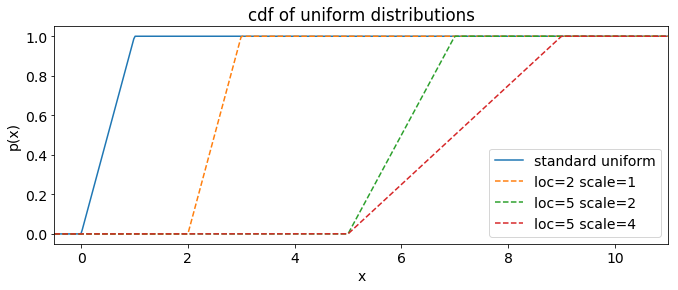

In [11]:
'''uniform cumulative distribution function examples'''
plt.figure(figsize=(11,4))
x = np.linspace(-.5, 11., 465)
plt.plot(x, stats.uniform.cdf(x), label='standard uniform')
plt.plot(x, stats.uniform(loc=2., scale=1.).cdf(x), '--', label='loc=2 scale=1')
plt.plot(x, unif_5_2.cdf(x), '--', label='loc=5 scale=2')
plt.plot(x, stats.uniform(loc=5., scale=4).cdf(x), '--', label='loc=5 scale=4')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-0.5, 11.)
plt.ylim(-0.05, 1.05)
plt.legend(loc='lower right')
plt.title('cdf of uniform distributions');

--- 

# Normalverteilung 
$x\in \mathbb{R}\qquad$ Wahrscheinlichkeitsdichte $f(x)$
<div class="alert alert-block alert-success">
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \mathcal{N}(\mu, \sigma^2)$$
</div>

### Standardnormalverteilung $\phi(x)$
Spezialfall $\mu=0$ und $\sigma^2=1$ : 
<div class="alert alert-block alert-success">
$$\qquad\qquad \phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} = \mathcal{N}(0, 1)$$
</div>

## Kennwerte der Gauß'schen Normalverteilung
<br>
<div class="alert alert-block alert-success">
$$\begin{aligned}
\mathcal{E}(X) & = \mu \\
\mathrm{Var}(X) & = \sigma^2 \\
\text{Schiefe} & = 0 \\
\text{Kurtosis} & = 0
\end{aligned}$$
</div>

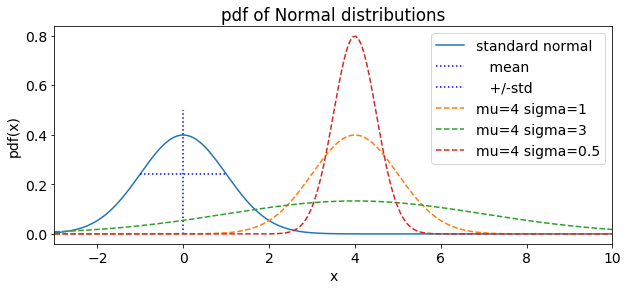

In [12]:
'''a bunch of normal "Gaussian" distributions'''
plt.figure(figsize=(10,4))
x = np.linspace(-3., 10., 201)
plt.plot(x, stats.norm.pdf(x), label='standard normal')
m = stats.norm.mean()             # mean (expectation value) of distribution
s = stats.norm.std()              # standard deviation of distribution
h = stats.norm.pdf(1)             # pdf (x=sigma=1) for height
plt.plot(2*[m], [0, 0.5], 'b:', label='   mean')       # vertical line at mean
plt.plot([m-s, m+s], 2*[h], 'b:', label='   +/-std' )  # horizontal line +/-std
# plot three other distributions at mu=4, different sigma (=std, =sqrt(var))
plt.plot(x, stats.norm(loc=4., scale=1.).pdf(x), '--', label='mu=4 sigma=1')
plt.plot(x, stats.norm(loc=4., scale=3.).pdf(x), '--', label='mu=4 sigma=3')
plt.plot(x, stats.norm(loc=4., scale=.5).pdf(x), '--', label='mu=4 sigma=0.5')
plt.xlim((-3, 10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('pdf of Normal distributions')
plt.legend();

# (kumulierte) Wahrscheinlichkeitsfunktion
<br>
<div class="alert alert-block alert-success">
$$F(x) = \int_{-\infty}^x f(a)\;\mathrm{d}a$$
</div>

## Standardnormalverteilungsfunktion
Für die Standardnormalverteilung $\mu=0$ und $\sigma=1$
<div class="alert alert-block alert-success">
$$\Phi(x) = \int_{-\infty}^x \phi(a)\;\mathrm{d}a$$
</div>

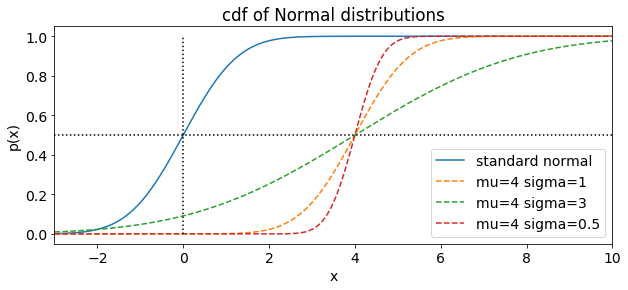

In [13]:
'''a bunch of normal Gaussian cdfs''' 
plt.figure(figsize=(10,4))
x = np.linspace(-3., 10., 201)
# the same four distributions as before:
plt.plot(x, stats.norm.cdf(x), label='standard normal')
plt.plot(x, stats.norm(loc=4., scale=1.).cdf(x), '--', label='mu=4 sigma=1')
plt.plot(x, stats.norm(loc=4., scale=3.).cdf(x), '--', label='mu=4 sigma=3')
plt.plot(x, stats.norm(loc=4., scale=.5).cdf(x), '--', label='mu=4 sigma=0.5')
plt.plot([-3., 10.], 2*[.5], 'k:')
plt.plot(2*[0.], [0., 1.], 'k:')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim((-3, 10))
plt.title('cdf of Normal distributions')
plt.legend(loc='lower right');

### Quantile

In [14]:
'''interesting quantiles'''
p = np.array([.50, .75, .90, .95, .975, .99])    # interesting percentiles   
z = stats.norm.ppf(p)                            # and their probability
print('cumulative probability p = {}'.format(np.round(p, decimals=3)))
print('located at             z = {}'.format(np.round(z, decimals=3)))

cumulative probability p = [ 0.5    0.75   0.9    0.95   0.975  0.99 ]
located at             z = [ 0.     0.674  1.282  1.645  1.96   2.326]


### Tabelle der Standardnormalverteilung

Historisch <img src="images/Gausstabelle-wikipedia.png" width="45%">
Quelle: https://en.wikipedia.org/wiki/Standard_normal_table oder jedes Statistiklehrbuch.

### 68-95-99,7-Prozent-Abschätzungsregel

<div class="alert alert-block alert-success">

- 68% der Werte liegen in $\mu \pm \;\quad \sigma$
- 95% der Werte liegen in $\mu \pm 2\cdot\sigma$
- 99.7% der Werte liegen in $\mu \pm 3\cdot\sigma$

</div>

In [15]:
'''1-2-3-sigma = 68, 95, 99.7'''
z = np.array([1., 2., 3.])          # range 1, 2, 3 (sigma)
p = stats.norm.cdf(z)               # has cumulated probability 
pr = 2*p-1.                         # probability range excluding both tails
original = np.get_printoptions()                            # save print options
np.set_printoptions(formatter={'float': '{: 6.2f}'.format}) # print 2 digits precision
print('range of +/- sigma:  z = {}'.format(z))
print('probability inside:  p = {} %'.format(100*pr))  
np.set_printoptions(**original)                             # restore print options

range of +/- sigma:  z = [  1.00   2.00   3.00]
probability inside:  p = [ 68.27  95.45  99.73] %


## Eigenschaften
(*Wichtig* für später)

### lineare Transformation
Ist $X\sim \mathcal{N}(\mu, \sigma^2)$, dann ist $Y = aX + b$ ebenfalls normalverteilt mit:
$$Y \sim \mathcal{N}(a\cdot\mu+b, a^2\cdot\sigma^2)$$

### Addition
Sind $X_1\sim \mathcal{N}(\mu_1, \sigma_1^2)$ und $X_2\sim \mathcal{N}(\mu_2, \sigma_2^2)$ beide unabhängig, dann ist $Y=X_1+X_2$ 
$$Y\sim \mathcal{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$$

### Standardisierung
Die *spezielle* lineare Transformation $Z = \frac{1}{\sigma}X - \frac{\mu}{\sigma}$ ergibt
$$Z\sim \phi = \mathcal{N}(0, 1)$$
weil darunter (siehe oben)
$$\mathcal{E}(Z) = 0$$
$$\mathrm{Var}(Z) = 1$$

Umgekehrt kann man aus der Standardnormalverteilung $\phi$ jede Normalverteilung $\mathcal{N}(\mu,\sigma^2)$ erhalten durch
$$X=\sigma Z + \mu$$

## Anpassen, *fit()*
Eine Verteilung an vorhandene Daten anfitten

fitted normal distribution has parameters mu=0.325, sigma=1.45


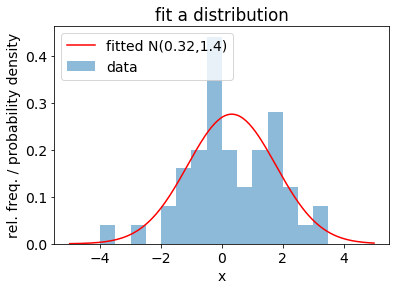

In [16]:
'''fit distribution to data'''
np.random.seed(98765432)
data = stats.norm(0.7, 1.5).rvs(size=50)    # fake data
(mu, sigma) = stats.norm.fit(data)          # find best fitting Gauss for data
plt.hist(data, bins=np.linspace(-5, 5, 21), label='data',
         normed=True, alpha=.5)                  # use relative frequencies
print('fitted normal distribution has parameters mu={:.3}, sigma={:.3}'
      .format(mu, sigma)) 
xgrid = np.linspace(-5, 5, 201)
plt.plot(xgrid, stats.norm(mu, sigma).pdf(xgrid), 'r-',
         label='fitted N({:.2},{:.2})'.format(mu, sigma))
plt.title('fit a distribution')
plt.xlabel('x')
plt.ylabel('rel. freq. / probability density')
plt.legend(loc='upper left');

----

# Exponentialverteilung

Stetige Erweiterung der *Geometrischen* Verteilung für $x\in \mathbb{R}$: Dauer bis zum Eintreten eines Ereignisses.

$$
f(x) = \begin{cases} \lambda e^{-\lambda x}\qquad & x\geq 0\\
                     0 \qquad & \text{sonst}
\end{cases}$$

#### Kenngrößen

$$\begin{aligned}
\mathcal{E}(X) & = \frac{1}{\lambda} \\
x_{med} & = \frac{\ln 2}{\lambda}\\
\mathrm{Var}(X) & = \frac{1}{\lambda^2}
\end{aligned}$$


### Realisierung in scipy.stats
    stats.expon?
    An exponential continuous random variable.
    The probability density function for `expon` is::
        expon.pdf(x) = exp(-x)     for ``x >= 0``.
    The probability density above is defined in the "standardized" form.
    To shift and/or scale the distribution use the ``loc`` and ``scale`` parameters.
    Specifically, ``expon.pdf(x, loc, scale)`` is identically equivalent to ``expon.pdf(y) / scale``
    with ``y = (x - loc) / scale``. A common parameterization for `expon` is in terms of the
    rate parameter ``lambda``, such that ``pdf = lambda * exp(-lambda * x)``. This
    parameterization corresponds to using ``scale = 1 / lambda``.

### Wahrscheinlichkeitsdichte $f(x)$, pdf

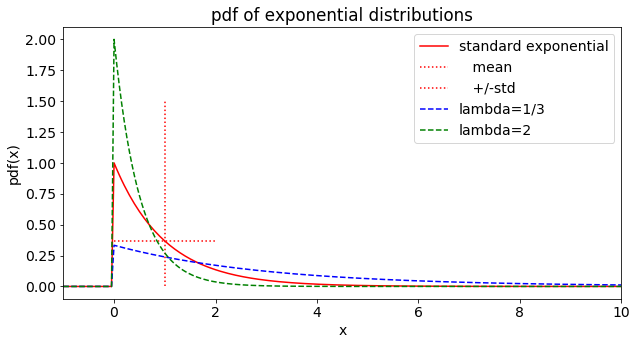

In [17]:
'''exponential distribution'''
plt.figure(figsize=(10,5))
x = np.linspace(-1., 10., 221)        # x values (negatives do not matter)
plt.plot(x, stats.expon.pdf(x), 'r-', label='standard exponential')
m = stats.expon.mean()                # mean (expectation value) of distribution
s = stats.expon.std()                 # and standard deviation
h = stats.expon.pdf(m)                # just for height at pdf(m):
plt.plot(2*[m], [0, 1.5], 'r:', label='   mean')      # vertical line for m
plt.plot([m-s, m+s], 2*[h], 'r:', label='   +/-std' ) # horiz. line for m +/- std
# two other exponentials with lambda=1/3 and 2
plt.plot(x, stats.expon(scale=3.).pdf(x), 'b--', label='lambda=1/3')
plt.plot(x, stats.expon(scale=.5).pdf(x), 'g--', label='lambda=2')
plt.xlim((-1, 10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('pdf of exponential distributions')
plt.legend();

### Wahrscheinlichkeitsverteilung $F(x)$,  cdf

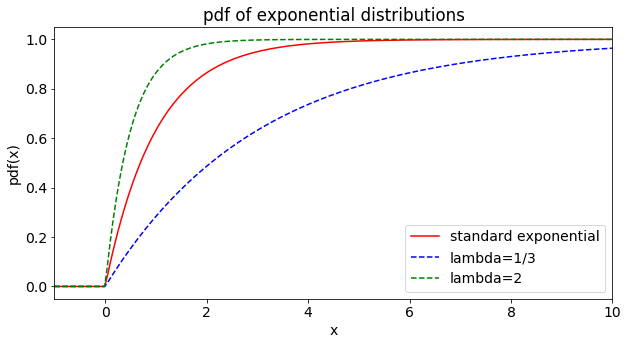

In [18]:
'''cdf of exponential distributions from before'''
plt.figure(figsize=(10,5))
x = np.linspace(-1., 10., 201)
plt.plot(x, stats.expon.cdf(x),           'r-',  label='standard exponential')
plt.plot(x, stats.expon(scale=3.).cdf(x), 'b--', label='lambda=1/3')
plt.plot(x, stats.expon(scale=.5).cdf(x), 'g--', label='lambda=2')
plt.xlim((-1, 10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('pdf of exponential distributions')
plt.legend(loc='lower right');

----

# Ausblick
### Außergewöhnliche Verteilungen

# Zusammenfassung

Kontinuierliche Verteilungen $x\in \mathbb{R}$

#### Rechteck-/Gleichverteilung
$$
f(x) = \begin{cases} const. \qquad & x\in [a,b]\\
                     0 \qquad & \text{sonst}
\end{cases}$$

#### Normalverteilung, Gaußverteilung
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \mathcal{N}(\mu, \sigma^2)$$

Standardnormalverteilung $\phi(x)$
$$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} = \mathcal{N}(0, 1)$$

#### Exponentialverteilung
$$
f(x) = \begin{cases} \lambda e^{-\lambda x}\qquad & x\geq 0\\
                     0 \qquad & \text{sonst}
\end{cases}$$

# Zusammenfassung kontinuierliche V. in Python `scipy.stats`

#### Funktionen und Methoden

    .uniform(loc, scale)    # borders   loc ... loc+scale
    .expon(scale)           # exponent  1/scale
    .norm(loc, scale)       # mu, sigma

    .expect()       # Erwartungswert
    .pdf(x)         # Wahrscheinlichkeitsdichteverteilung "probability density function"
    .cdf(x)         # Verteilungsfunktion "cumulative density function"
    .ppf(p)         # Umkehrung davon: percentile 
    .rvs()          # Zufallserergebnis "random variables"  
                    # (optional Anzahl der Werte)
    .fit()          # Anfitten einer Verteilung an Ereignisse/Daten
    
    .expect()       # Erwartungswert
    .var()          # Varianz
    .std()          # Standardabweichung
    .kurtosis()     # Kurtosis
    ...

# Fragen?